In [2]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'


In [3]:
df_ratings = pd.read_csv('album_ratings.csv') # Metacritic/AOTY


In [4]:
df_ratings.describe().T
# list(df_ratings.columns) 


,count,mean,std,min,25%,50%,75%,max
Release Year,32358.0,2006.667810,14.132255,1940.0,2002.0,2012.0,2017.0,2020.0
Metacritic Critic Score,13884.0,73.285148,8.399107,15.0,69.0,74.0,79.0,98.0
Metacritic Reviews,13884.0,12.483434,7.911986,4.0,6.0,10.0,17.0,51.0
Metacritic User Score,9099.0,7.782020,0.978036,1.4,7.4,8.0,8.5,9.5
Metacritic User Reviews,10574.0,63.163893,325.204608,3.0,8.0,14.0,37.0,14720.0
AOTY Critic Score,32358.0,72.808332,11.214989,4.0,67.0,74.0,80.0,100.0
AOTY Critic Reviews,32358.0,5.645003,6.179734,1.0,2.0,3.0,7.0,48.0
AOTY User Score,32358.0,71.283794,9.653036,0.0,67.0,73.0,78.0,100.0
AOTY User Reviews,32358.0,61.988782,184.221848,1.0,7.0,14.0,39.0,4530.0


In [5]:
df_ratings = df_ratings.rename(columns={"Title": "album_name", "Artist": "artist"})
# df_ratings = df_ratings.rename(columns={"Title": "album_name"})
# df_ratings.head(20)
# df_ratings[df_ratings['Artist'] == 'Ani DiFranco']

In [6]:
df_ratings['album_name'].nunique()


30231

In [13]:
# df_ratings[df_ratings['artist'] == 'Ani DiFranco']

,artist,album_name,Release Month,Release Day,Release Year,Format,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
4504,Ani DiFranco,Not a Pretty Girl,July,18,1995,LP,Righteous Babe,NaN,NaN,NaN,NaN,NaN,95,2,77,5
13039,Ani DiFranco,Little Plastic Castle,February,17,1998,LP,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
20402,Ani DiFranco,Binary,June,9,2017,LP,Righteous Babe,Singer-Songwriter,77.0,4.0,NaN,NaN,77,4,65,5
30372,Ani DiFranco,Red Letter Year,September,30,2008,LP,Righteous Babe,NaN,79.0,8.0,7.8,8.0,74,4,68,1
30631,Ani DiFranco,Revelling/Reckoning,April,10,2001,LP,Righteous Babe,Singer-Songwriter,78.0,13.0,7.9,13.0,63,4,74,1
30651,Ani DiFranco,Allergic to Water,November,4,2014,LP,Righteous Babe Records,NaN,71.0,5.0,6.8,5.0,66,5,76,2
31074,Ani DiFranco,Knuckle Down,January,25,2005,LP,Righteous Babe,Singer-Songwriter,73.0,18.0,8.6,18.0,72,8,85,1


In [7]:
df_spotify_1M = pd.read_csv('tracks_features.csv') #Spotify/Kaggle 1.2M tracks


In [8]:
# df_spotify_1M.describe().T
# df_spotify_1M.info()
list(df_spotify_1M.columns)


['id',
 'name',
 'album',
 'album_id',
 'artists',
 'artist_ids',
 'track_number',
 'disc_number',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'time_signature',
 'year',
 'release_date']

In [9]:
df_spotify = df_spotify_1M.rename(columns={"id": "track_id", "name": "track_name", "album": "album_name", "artists": "artist"})
df_spotify.head(2)


,track_id,track_name,album_name,album_id,artist,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.0261,0.000011,0.356,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,['Rage Against The Machine'],['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.0129,0.000071,0.155,0.489,103.680,206200,4.0,1999,1999-11-02


In [12]:
pd.set_option('display.max_rows', 500)
df_spotify[df_spotify['artist'].apply(lambda d:d[2:-2].split(',')[0]) == 'Ani DiFranco']

,track_id,track_name,album_name,album_id,artist,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
108,6x7c49NEWt9cM9nHiSntQd,Swing (Radio Edit),Swing Set,16707paUqnfatdD8OwN3Dc,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],1,1,False,0.834,...,0.1780,0.44600,0.000014,0.0656,0.6320,91.819,237187,4.0,2000,2000-07-11
109,0YSYfKMk0JBl7mmWzSsfPe,Swing (Album Version),Swing Set,16707paUqnfatdD8OwN3Dc,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],2,1,False,0.843,...,0.1500,0.47500,0.000036,0.0972,0.5380,91.804,373067,4.0,2000,2000-07-11
110,382zGDGUbJK1SMzXK3xucw,To The Teeth (Shootout Remix),Swing Set,16707paUqnfatdD8OwN3Dc,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],3,1,False,0.720,...,0.1140,0.18200,0.175000,0.2180,0.3560,159.552,372293,4.0,2000,2000-07-11
111,4H3tjdqHW2CG17lsytVVqa,Do Re Me (Live),Swing Set,16707paUqnfatdD8OwN3Dc,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],4,1,False,0.483,...,0.1070,0.72100,0.000058,0.5790,0.5750,81.399,192733,3.0,2000,2000-07-11
112,1oIwjU5cRePn7WgKRBe3Bm,When I'm Gone,Swing Set,16707paUqnfatdD8OwN3Dc,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],5,1,False,0.464,...,0.0596,0.93200,0.000001,0.1090,0.2340,104.521,260880,3.0,2000,2000-07-11
113,0NS9gap3TNaTQp1wQEnTYt,Hurricane,Swing Set,16707paUqnfatdD8OwN3Dc,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],6,1,False,0.695,...,0.1140,0.08450,0.000005,0.0636,0.7150,138.245,433053,4.0,2000,2000-07-11
114,4ZhtIgZ3rIXQnjdDns3I7v,To the Teeth,To The Teeth,2gH0pLuQAJm9eWxIM87lSy,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],1,1,False,0.493,...,0.0389,0.67600,0.002550,0.1210,0.2090,112.313,462600,3.0,1999,1999-11-16
115,6oRa9jJCB2ujPpRYmM7nZJ,Soft Shoulder,To The Teeth,2gH0pLuQAJm9eWxIM87lSy,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],2,1,False,0.457,...,0.0786,0.52700,0.000182,0.0876,0.2820,115.675,364733,4.0,1999,1999-11-16
116,4ct2vSH6pJWu15UZE3gVo1,Wish I May,To The Teeth,2gH0pLuQAJm9eWxIM87lSy,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],3,1,False,0.804,...,0.0388,0.42100,0.000784,0.3690,0.5870,120.376,293027,4.0,1999,1999-11-16
117,2zdpQgRnT5YQdsN2FNIDpA,Freakshow,To The Teeth,2gH0pLuQAJm9eWxIM87lSy,['Ani DiFranco'],['0AiTwNtYX8m4uhfU7rJ8RD'],4,1,False,0.689,...,0.0514,0.63300,0.000250,0.1450,0.2850,99.851,342467,4.0,1999,1999-11-16


In [189]:
df_spotify['artist'] = df_spotify['artist'].apply(lambda d:d[2:-2].split(',')[0] if len(d)>4 else d)


In [190]:
df_spotify.head(30)

,track_id,track_name,album_name,album_id,artist,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
0,7lmeHLHBe4nmXzuXc0HDjk,Testify,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],1,1,False,0.470,...,0.0727,0.026100,0.000011,0.3560,0.503,117.906,210133,4.0,1999,1999-11-02
1,1wsRitfRRtWyEapl0q22o8,Guerrilla Radio,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.599,...,0.1880,0.012900,0.000071,0.1550,0.489,103.680,206200,4.0,1999,1999-11-02
2,1hR0fIFK2qRG3f3RF70pb7,Calm Like a Bomb,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],3,1,False,0.315,...,0.4830,0.023400,0.000002,0.1220,0.370,149.749,298893,4.0,1999,1999-11-02
3,2lbASgTSoDO7MTuLAXlTW0,Mic Check,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],4,1,True,0.440,...,0.2370,0.163000,0.000004,0.1210,0.574,96.752,213640,4.0,1999,1999-11-02
4,1MQTmpYOZ6fcMQc56Hdo7T,Sleep Now In the Fire,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],5,1,False,0.426,...,0.0701,0.001620,0.105000,0.0789,0.539,127.059,205600,4.0,1999,1999-11-02
5,2LXPNLSMAauNJfnC58lSqY,Born of a Broken Man,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],6,1,False,0.298,...,0.0727,0.053800,0.001520,0.2010,0.194,148.282,280960,4.0,1999,1999-11-02
6,3moeHk8eIajvUEzVocXukf,Born As Ghosts,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,False,0.417,...,0.1750,0.000427,0.000134,0.1070,0.483,90.395,202040,4.0,1999,1999-11-02
7,4llunZfVXv3NvUzXVB3VVL,Maria,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],8,1,False,0.277,...,0.0883,0.006940,0.000054,0.1880,0.618,172.848,228093,4.0,1999,1999-11-02
8,21Mq0NzFoVRvOmLTOnJjng,Voice of the Voiceless,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],9,1,False,0.441,...,0.0440,0.019500,0.006840,0.1500,0.418,83.371,151573,4.0,1999,1999-11-02
9,6s2FgJbnnMwFTpWJZzvb6z,New Millennium Homes,The Battle Of Los Angeles,2eia0myWFgoHuttJytCxgX,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],10,1,False,0.448,...,0.0676,0.003060,0.000000,0.0987,0.761,92.777,224933,4.0,1999,1999-11-02


In [191]:
# df_merged = pd.merge(df_spotify, df_ratings, on=['album_name', 'artists'])
df_merged = pd.merge(df_spotify, df_ratings, on=['artist', 'album_name'])


In [192]:
# df_merged = df_merged.apply(lambda d:d[2:-2] if len(d)>4 else d)


In [193]:
df_merged.count

<bound method DataFrame.count of                      track_id             track_name  \
0      6ZU9RJIZ0fNaFuQM57bDIA              Bombtrack   
1      3FUS56gKr9mVBmzvlnodlh    Killing In the Name   
2      3tTL7jlSkowXidYeafFtwG    Take the Power Back   
3      2vuDdXqekkDCSdawJyUpT6     Settle for Nothing   
4      11cxKUEgnVAlesUKt4e3br     Bullet In the Head   
...                       ...                    ...   
43497  5FtfppaCdF9CO6Qz9AMsPC       Legitimate Drugz   
43498  4BWm2EGgAs4MyiAQvXAXWG         Perfect Timing   
43499  4r2racAjxAqYE7hBNGu85s          Codeine Tales   
43500  6bDoVG0197nFhJOjiDAGv5           Love or Lust   
43501  2wa5H2O3g7ayGM6e0WZV3c  Letter to My Daughter   

                     album_name                album_id  \
0      Rage Against The Machine  4LaRYkT4oy47wEuQgkLBul   
1      Rage Against The Machine  4LaRYkT4oy47wEuQgkLBul   
2      Rage Against The Machine  4LaRYkT4oy47wEuQgkLBul   
3      Rage Against The Machine  4LaRYkT4oy47wEuQgkLBul   

In [194]:
df_merged.head(20)

,track_id,track_name,album_name,album_id,artist,artist_ids,track_number,disc_number,explicit,danceability,...,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
0,6ZU9RJIZ0fNaFuQM57bDIA,Bombtrack,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],1,1,True,0.478,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
1,3FUS56gKr9mVBmzvlnodlh,Killing In the Name,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],2,1,True,0.457,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
2,3tTL7jlSkowXidYeafFtwG,Take the Power Back,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],3,1,True,0.542,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
3,2vuDdXqekkDCSdawJyUpT6,Settle for Nothing,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],4,1,False,0.516,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
4,11cxKUEgnVAlesUKt4e3br,Bullet In the Head,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],5,1,True,0.418,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
5,1IDAJagxB9AQjjYXaiDK1j,Know Your Enemy,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],6,1,True,0.574,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
6,6zbHSDJjgrNdfIxPyGfPBt,Wake Up,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],7,1,False,0.411,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
7,3YEk8mVdMI7rxtfimlUd1G,Fistful of Steel,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],8,1,False,0.520,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
8,0WK0EqiidP6WEDOHK34HEe,Township Rebellion,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],9,1,True,0.525,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743
9,1zVE9JBBy8j0KmlbM8Xwhi,Freedom,Rage Against The Machine,4LaRYkT4oy47wEuQgkLBul,Rage Against The Machine,['2d0hyoQ5ynDBnkvAbJKORj'],10,1,False,0.499,...,Epic,Alternative Metal,NaN,NaN,NaN,NaN,94,3,88,743


In [195]:
df_merged[df_merged['artist'] == 'Ani DiFranco']

,track_id,track_name,album_name,album_id,artist,artist_ids,track_number,disc_number,explicit,danceability,...,Label,Genre,Metacritic Critic Score,Metacritic Reviews,Metacritic User Score,Metacritic User Reviews,AOTY Critic Score,AOTY Critic Reviews,AOTY User Score,AOTY User Reviews
13164,1XAY4zlJWqJl3d6Eqy1A7q,Little Plastic Castle,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],1,1,False,0.610,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13165,2kEsa3JlXjwmx9kC0X0jH0,Fuel,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],2,1,False,0.786,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13166,7LjFcq4C2NGlXrSadUma79,Gravel,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],3,1,False,0.757,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13167,7A2lr0HB8A2QXZdB3AonvH,As Is,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],4,1,False,0.745,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13168,1BLV8sIYFJrjMcnsZ8sXyA,Two Little Girls,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],5,1,False,0.719,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13169,4l5MinR4rQ2uuJ2jCrr6c5,Deep Dish,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],6,1,False,0.711,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13170,22b4H6q30tD6d7XXjfZFN3,Loom,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],7,1,False,0.584,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13171,0GFjTaBSmid0qY3pACo3J6,Pixie,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],8,1,False,0.701,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13172,6npEPLgNyJ4UzWyjSyH1KJ,Swan Dive,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],9,1,False,0.562,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6
13173,64MVcLAwb8sIVxwC8FxDZT,Glass House,Little Plastic Castle,68ftrFpQIkuZJ1m6X3bbZt,Ani DiFranco,['0AiTwNtYX8m4uhfU7rJ8RD'],10,1,False,0.626,...,Righteous Babe,Indie Folk,NaN,NaN,NaN,NaN,74,6,65,6


In [196]:
# pd.set_option('display.max_rows', 500)
df_merged[['artist', 'album_name']].head(50)


,artist,album_name
0,Rage Against The Machine,Rage Against The Machine
1,Rage Against The Machine,Rage Against The Machine
2,Rage Against The Machine,Rage Against The Machine
3,Rage Against The Machine,Rage Against The Machine
4,Rage Against The Machine,Rage Against The Machine
5,Rage Against The Machine,Rage Against The Machine
6,Rage Against The Machine,Rage Against The Machine
7,Rage Against The Machine,Rage Against The Machine
8,Rage Against The Machine,Rage Against The Machine
9,Rage Against The Machine,Rage Against The Machine


In [197]:
df_merged.dtypes


track_id                    object
track_name                  object
album_name                  object
album_id                    object
artist                      object
artist_ids                  object
track_number                 int64
disc_number                  int64
explicit                      bool
danceability               float64
energy                     float64
key                          int64
loudness                   float64
mode                         int64
speechiness                float64
acousticness               float64
instrumentalness           float64
liveness                   float64
valence                    float64
tempo                      float64
duration_ms                  int64
time_signature             float64
year                         int64
release_date                object
Release Month               object
Release Day                 object
Release Year                 int64
Format                      object
Label               

In [198]:
for col in df_merged.columns:  # iterate over all columns
#   if df_merged[col].dtype not in [np.int64, np.float64] and col=='Label':  # only for LABEL
  if df_merged[col].dtype not in [np.int64, np.float64]:  # ignore integer and float columns
    # print a header, all unique values, and a separator
    print('Unique Values for {}'.format(col))  
#     print(df_merged[col].unique())
    print(df_merged[col].unique())  
    print('')
    

Unique Values for track_id
['6ZU9RJIZ0fNaFuQM57bDIA' '3FUS56gKr9mVBmzvlnodlh'
 '3tTL7jlSkowXidYeafFtwG' ... '4r2racAjxAqYE7hBNGu85s'
 '6bDoVG0197nFhJOjiDAGv5' '2wa5H2O3g7ayGM6e0WZV3c']

Unique Values for track_name
['Bombtrack' 'Killing In the Name' 'Take the Power Back' ...
 'Codeine Tales' 'Love or Lust' 'Letter to My Daughter']

Unique Values for album_name
['Rage Against The Machine' "Scarlet's Walk" 'Big Bam Boom' ... 'Relayted'
 'John Prine' 'QPac']

Unique Values for album_id
['4LaRYkT4oy47wEuQgkLBul' '5JnLg2nd43M3NS4NfVrIdQ'
 '3RZ6xnejkUMgzmkdlsywFu' ... '31oyGwiewTzgbSLuE9tBgy'
 '5t4FHrIAHI8nolSAOBRgPp' '1MDud03tF3SowYAYCM3qIj']

Unique Values for artist
['Rage Against The Machine' 'Tori Amos' 'Daryl Hall & John Oates' ...
 'Regina Spektor' 'Gayngs' 'Quando Rondo']

Unique Values for artist_ids
["['2d0hyoQ5ynDBnkvAbJKORj']" "['1KsASRNugxU85T0u6zSg32']"
 "['77tT1kLj6mCWtFNqiOmP9H']" ... "['3z6Gk257P9jNcZbBXJNX5i']"
 "['3OUN7gnsDijEfvaHpXAAzI']" "['4IprNlQiJZUUJhDl0fL2SL']"]

Un

In [199]:
pd.set_option('display.max_rows', 500)
df_merged['Genre'].value_counts()


Indie Rock                 3224
Hip Hop                    2129
Indie Pop                  1874
Singer-Songwriter          1860
Alternative Rock           1474
Pop Rock                   1132
Trap Rap                    846
Folk                        814
Pop                         740
Hard Rock                   665
R&B                         661
Art Pop                     617
Synthpop                    590
Country                     553
Indie Folk                  552
Post-Punk                   540
Electropop                  512
Death Metal                 505
Dream Pop                   438
Electronic                  416
Alternative R&B             412
Alt-Country                 400
Psychedelic Rock            398
Ambient                     387
Garage Rock                 383
Alternative Metal           366
Power Pop                   327
Rock                        324
Noise Rock                  315
Soul                        297
Neo-Psychedelia             279
American

In [200]:
usage_by_col = df_merged.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes 
mbs


44.940225

In [201]:
df_merged.isnull().any()


track_id                   False
track_name                 False
album_name                 False
album_id                   False
artist                     False
artist_ids                 False
track_number               False
disc_number                False
explicit                   False
danceability               False
energy                     False
key                        False
loudness                   False
mode                       False
speechiness                False
acousticness               False
instrumentalness           False
liveness                   False
valence                    False
tempo                      False
duration_ms                False
time_signature             False
year                       False
release_date               False
Release Month               True
Release Day                 True
Release Year               False
Format                     False
Label                       True
Genre                       True
Metacritic

In [202]:
df_merged.shape


(43502, 38)

In [203]:
df_merged.isna().sum()


track_id                       0
track_name                     0
album_name                     0
album_id                       0
artist                         0
artist_ids                     0
track_number                   0
disc_number                    0
explicit                       0
danceability                   0
energy                         0
key                            0
loudness                       0
mode                           0
speechiness                    0
acousticness                   0
instrumentalness               0
liveness                       0
valence                        0
tempo                          0
duration_ms                    0
time_signature                 0
year                           0
release_date                   0
Release Month                338
Release Day                  338
Release Year                   0
Format                         0
Label                       3814
Genre                       7689
Metacritic

In [204]:
df_merged.isna().any(axis='columns').sum()


29197

In [205]:
df_merged.max()


track_id                       7zzwQwN3jNiK46B2M9kL2Q
track_name                                      海になって
album_name                                        ~~~
album_id                       7zo4kiBFeJ6fTRJLTKo7XU
artist                                             yU
artist_ids                 ['7zyR3B4IxcARbCrRYKxkOc']
track_number                                       47
disc_number                                         5
explicit                                         True
danceability                                    0.982
energy                                              1
key                                                11
loudness                                        5.118
mode                                                1
speechiness                                     0.965
acousticness                                    0.996
instrumentalness                                0.999
liveness                                        0.995
valence                     

In [206]:
df_merged['album_name'].nunique()  # counts unique value in album_name column


3835

<AxesSubplot:ylabel='Frequency'>

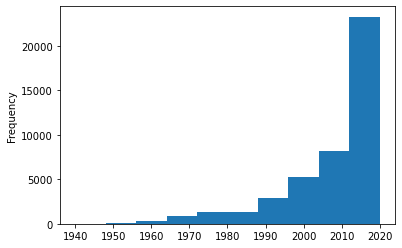

In [207]:
df_merged['Release Year'].plot(kind='hist')


In [208]:
df_merged_no_label = df_merged[df_merged['Label'].isnull()]
df_merged_no_label['album_name'].nunique()
# 833 of the unique albums do not have a record label


342

In [209]:
df_merged.groupby(['album_name', 'artist']).size()

album_name              artist         
"Let's Rock"            The Black Keys     12
"V" Is for Vagina       Puscifer           11
'74 Jailbreak           AC/DC               5
'Bout Love              Bill Withers        8
'Justments              Bill Withers       10
                                           ..
soil                    serpentwithfeet    11
souvenir                Jonah Yano         10
the love that you want  Lewis Watson       11
the masquerade          mxmtoon            20
~~~                     Ana Roxanne         6
Length: 3904, dtype: int64